# <u>Submission instructions</u>
### Submission must be in pairs, unless otherwise authorized.
#### Submit by 28/2/2024

<ul style="font-size: 17px">
<li> This notebook contains all the questions. You should follow the instructions below.</li>
<li> Solutions for both theoretical and practical parts should be written in this notebook</li>
</ul>

<h3> Moodle submission</h3>


<p style="font-size: 17px">
You should submit three files:
</p>
<ul style="font-size: 17px">
<li>IPYNB notebook:
  <ul>
  <li>All the wet and dry parts, including code, graphs, discussion, etc.</li>
  </ul>
</li>
<li>PDF file:
  <ul>
  <li>Export the notebook to PDF. Make sure that all the cells are visible.</li>
  </ul>
</li>
<li>Pickle file:
  <ul>
    <li>As requested in Q2.a</li>
  </ul>
</li>
</ul>
<p style="font-size: 17px">
All files should be in the following format: "HW1_ID1_ID2.file"
<br>
Good Luck!
</p>

<h1> Question 1</h1>

## I. Softmax Derivative (10pt)

<p style="font-size: 17px">
Derive the gradients of the softmax function and demonstrate how the expression can be reformulated solely by using the softmax function, i.e., in some expression where only $softmax(x)$, but not $x$, is present). Recall that the softmax function is defined as follows:
$$softmax(x)_i = \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}}$$

### I. Softmax Derivative - Answer:
$$\frac{\partial softmax(x)_i}{\partial x_k} = \text{}$$

1. When \( i = j \):
\begin{align*}
\frac{\partial \text{softmax}(\mathbf{x})_j}{\partial x_k} &= \frac{e^{x_j} \sum_{j=1}^{n} e^{x_j} - (e^{x_j})^2}{(\sum_{j=1}^{n} e^{x_j})^2} \\
&= \frac{e^{x_j}}{\sum_{j=1}^{n} e^{x_j}} \left(1 - \frac{e^{x_j}}{\sum_{j=1}^{n} e^{x_j}}\right) \\
&= \text{softmax}(\mathbf{x})_j (1 - \text{softmax}(\mathbf{x})_j)
\end{align*}

2. When \( i != j \):
\begin{align*}
\frac{\partial \text{softmax}(\mathbf{x})_i}{\partial x_k} &= \frac{- e^{x_i} e^{x_j}}{(\sum_{j=1}^{n} e^{x_j})^2} \\
&= -\frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}} \frac{e^{x_j}}{\sum_{j=1}^{n} e^{x_j}} \\
&= - \text{softmax}(\mathbf{x})_i \text{softmax}(\mathbf{x})_j
\end{align*}


## II. Cross-Entropy Gradient (10pt)
<p style="font-size: 17px">
Derive the gradient of cross-entropy loss with regard to the inputs of a softmax function. i.e., find the gradients with respect to the softmax input vector $\theta$, when the prediction is denoted by $\hat{y} = softmax(\theta)$. Remember the cross entropy function is:
$$CE(y, \hat{y}) = -\sum_i y_i log(\hat{y_i})$$


<p style="font-size: 17px">where $y$ is the one-hot label vector, and $\hat{y}$ is the predicted probability vector for all classes.

### II. Cross-Entropy Gradient - Answer

<!--- write your answer -->
$$\frac{\partial CE(y, \hat{y})}{\partial\theta} = - \sum_i \frac{y_i} {\hat{y_i}}$$

# Question 2

## I. Derivative Of Activation Functions (10pt)

<p style="font-size: 17px">
The following cell contains an implementation of some activation functions. Implement the corresponding derivatives.</p>

In [6]:
import torch

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def tanh(x):
    return torch.div(torch.exp(x) - torch.exp(-x), torch.exp(x) + torch.exp(-x))


def softmax(x):
    exp_x = torch.exp(x.T - torch.max(x, dim=-1).values).T  # Subtracting max(x) for numerical stability
    return exp_x / exp_x.sum(dim=-1, keepdim=True)

In [7]:
def d_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))


def d_tanh(x):
    return 1 - torch.pow(tanh(x), 2)


def d_softmax(x):
    s = softmax(x)
    return s * (1 - s)

## II. Train a Fully Connected network on MNIST (30pt)

<p style="font-size: 17px">In the following exercise, you will create a classifier for the MNIST dataset.
You should write your own training and evaluation code and meet the following
constraints:
<ul>
<li> You are only allowed to use torch tensor manipulations.</li>
<li> You are NOT allowed to use:
  <ul>
  <li> Auto-differentiation - backward()</li>
  <li> Built-in loss functions</li>
  <li> Built-in activations</li>
  <li> Built-in optimization</li>
  <li> Built-in layers (torch.nn)</li>
  </ul>
  </li>
</ul>
</h4>

<p style="font-size: 17px">
 a) The required classifier class is defined.
<ul style="font-size: 17px">
<li> You should implement the backward pass of the model.
<li> Train the model and plot the model's accuracy and loss (both on train and test sets) as a function of the epochs.
<li> You should save the model's weights and biases. Change the student_ids to yours.
</ul>
<p style="font-size: 17px">In this section, you <b>must</b> use the "set_seed" function with the given seed and <b>sigmoid</b> as an activation function.
</p>

In [8]:
import torch
import torchvision
from torch.utils.data import DataLoader

import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Constants
SEED = 42
EPOCHS = 16
BATCH_SIZE = 32
NUM_OF_CLASSES = 10

# Setting seed
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ["PYTHONHASHSEED"] = str(seed)


# Transformation for the data
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torch.flatten])


# Cross-Entropy loss implementation
def one_hot(y, num_of_classes=10):
    hot = torch.zeros((y.size()[0], num_of_classes))
    hot[torch.arange(y.size()[0]), y] = 1
    return hot

def cross_entropy(y, y_hat):
    return -torch.sum(one_hot(y) * torch.log(y_hat)) / y.size()[0]

In [9]:
# Create dataloaders
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                            download=True, transform=transform)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)


test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                           download=True, transform=transform)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE,)

In [10]:
class FullyConnectedNetwork:
    def __init__(self, input_size, output_size, hidden_size1, activiation_func, lr=0.01):
        # parameters
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size1 = hidden_size1

        # activation function
        self.activation_func = activiation_func

        # weights
        self.W1 = torch.randn(self.input_size, self.hidden_size1)
        self.b1 = torch.zeros(self.hidden_size1)

        self.W2 = torch.randn(self.hidden_size1, self.output_size)
        self.b2 = torch.zeros(self.output_size)

        self.lr = lr

    def forward(self, x):
        z1 = torch.matmul(x, self.W1) + self.b1
        h1 = self.activation_func(z1)
        z2 = torch.matmul(h1, self.W2) + self.b2
        y_hat = softmax(z2)
        return y_hat

    def backward(self, x, y, y_hat):
        z1 = torch.matmul(x, self.W1) + self.b1
        h1 = self.activation_func(z1)

        dL_dz2 = y_hat - one_hot(y)
        dz2_dW2 = h1
        dL_dW2 = torch.matmul(dz2_dW2.t(), dL_dz2)
        dL_db2 = torch.sum(dL_dz2, axis=0)

        dz2_dh1 = self.W2
        dL_dh1 = torch.matmul(dL_dz2, dz2_dh1.T)
        dh1_dz1 = d_sigmoid(z1)
        dL_dz1 = dL_dh1 * dh1_dz1

        dL_dW1 = torch.matmul(x.T, dL_dz1)
        dL_db1 = torch.sum(dL_dz1, axis=0)

        self.W1 -= self.lr * dL_dW1
        self.b1 -= self.lr * dL_db1
        self.W2 -= self.lr * dL_dW2
        self.b2 -= self.lr * dL_db2

In [11]:
set_seed(SEED)
model = FullyConnectedNetwork(784, 10, 128, sigmoid, lr=0.01)

In [12]:
def train(model, train_dataloader):
    train_accuracy = 0
    train_loss = 0.0
    total_train_loss = 0.0

    correct_predicted = 0
    total_predicted = 0

    for inputs, labels in train_dataloader:
        outputs = model.forward(inputs)

        loss = cross_entropy(labels, outputs)
        total_train_loss += loss

        model.backward(inputs, labels, outputs)

    train_loss = total_train_loss / len(train_dataloader)

    for inputs, labels in train_dataloader:
        outputs = model.forward(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_predicted += labels.size(0)
        correct_predicted += (predicted == labels).sum()

    train_accuracy = correct_predicted / total_predicted

    return train_loss, train_accuracy

In [13]:
def test(model, test_dataloader):
    test_accuracy = 0
    test_loss = 0.0
    total_test_loss = 0.0

    correct_predicted = 0
    total_predicted = 0

    for inputs, labels in test_dataloader:

        outputs = model.forward(inputs)
        total_test_loss += cross_entropy(labels, outputs)

        _, predicted = torch.max(outputs.data, 1)
        total_predicted += labels.size(0)
        correct_predicted += (predicted == labels).sum()

    test_loss = total_test_loss / len(test_dataloader)
    test_accuracy = correct_predicted / total_predicted

    return test_loss, test_accuracy

In [14]:
def print_loss_and_accuracy_by_epochs(model, train_dataloader, test_dataloader, epochs):
    train_losses, train_accuracies = torch.zeros(epochs), torch.zeros(epochs)
    test_losses, test_accuracies = torch.zeros(epochs), torch.zeros(epochs)

    for epoch in range(epochs):
        train_loss, train_accuracy = train(model, train_dataloader)
        test_loss, test_accuracy = test(model, test_dataloader)

        train_losses[epoch] = train_loss
        train_accuracies[epoch] = train_accuracy

        test_losses[epoch] = test_loss
        test_accuracies[epoch] = test_accuracy

        print("*" * 50)
        print(f"Epoch {epoch + 1}:")
        print(f"Train: average loss: {train_losses[epoch]:.2f}, accuracy: {train_accuracies[epoch]:.5f}")
        print(f"Test: average loss: {test_losses[epoch]:.2f}, accuracy: {test_accuracies[epoch]:.5f}")

    return train_losses, train_accuracies, test_losses, test_accuracies

In [15]:
def plot_loss_and_accuracy_graphs_by_epochs(train_losses, train_accuracies, test_losses, test_accuracies, epochs, lr):
    fig, axes = plt.subplots(2, 1, figsize=(8, 6))
    num_epochs = [i for i in range(epochs)]

    axes[0].plot(num_epochs, train_losses, label='train', color='red')
    axes[0].plot(num_epochs, test_losses, label='test', color='blue')
    axes[0].set_title(f'Losses by epochs with learning rate of {lr}')
    axes[0].set_xlabel('epochs')
    axes[0].set_ylabel('value')
    axes[0].legend()

    axes[1].plot(num_epochs, train_accuracies, label='train', color='red')
    axes[1].plot(num_epochs, test_accuracies, label='test', color='blue')
    axes[1].set_title(f'Accuracies by epochs with learning rate of {lr}')
    axes[1].set_xlabel('epochs')
    axes[1].set_ylabel('percentage')
    axes[1].legend()

    plt.tight_layout()

    plt.show()

In [16]:
train_losses, train_accuracies, test_losses, test_accuracies = print_loss_and_accuracy_by_epochs(model, train_dataloader, test_dataloader, EPOCHS)

**************************************************
Epoch 1:
Train: average loss: 0.70, accuracy: 0.88877
Test: average loss: 0.38, accuracy: 0.88540
**************************************************
Epoch 2:
Train: average loss: 0.31, accuracy: 0.91687
Test: average loss: 0.30, accuracy: 0.90820
**************************************************
Epoch 3:
Train: average loss: 0.25, accuracy: 0.93092
Test: average loss: 0.26, accuracy: 0.92010
**************************************************
Epoch 4:
Train: average loss: 0.21, accuracy: 0.93972
Test: average loss: 0.24, accuracy: 0.92560
**************************************************
Epoch 5:
Train: average loss: 0.18, accuracy: 0.94652
Test: average loss: 0.23, accuracy: 0.93070
**************************************************
Epoch 6:
Train: average loss: 0.17, accuracy: 0.95208
Test: average loss: 0.21, accuracy: 0.93470
**************************************************
Epoch 7:
Train: average loss: 0.15, accuracy: 0.95627
T

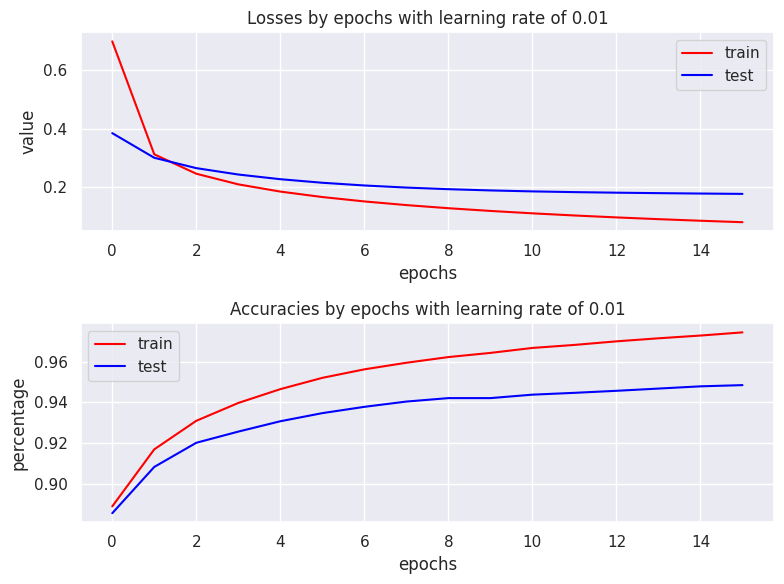

In [17]:
plot_loss_and_accuracy_graphs_by_epochs(train_losses, train_accuracies, test_losses, test_accuracies, EPOCHS, model.lr)

In [18]:
students_ids = "342791324_931214522"
torch.save({"W1": model.W1, "W2": model.W2, "b1": model.b1, "b2": model.b2}, f"HW1_{students_ids}.pkl")

<p style="font-size: 17px"> b) Train the model with various learning rates (at least 3).
<ul style="font-size: 17px">
<li> Plot the model's accuracy and loss (both on train and test sets) as a function of the epochs.
<li>Discuss the differences in training with different learning rates. Support your answer with plots.

Small learning rate:
**************************************************
Epoch 1:
Train: average loss: 0.91, accuracy: 0.86433
Test: average loss: 0.46, accuracy: 0.86780
**************************************************
Epoch 2:
Train: average loss: 0.40, accuracy: 0.89833
Test: average loss: 0.35, accuracy: 0.89560
**************************************************
Epoch 3:
Train: average loss: 0.32, accuracy: 0.91407
Test: average loss: 0.31, accuracy: 0.90770
**************************************************
Epoch 4:
Train: average loss: 0.28, accuracy: 0.92345
Test: average loss: 0.28, accuracy: 0.91480
**************************************************
Epoch 5:
Train: average loss: 0.25, accuracy: 0.93028
Test: average loss: 0.26, accuracy: 0.91880
**************************************************
Epoch 6:
Train: average loss: 0.23, accuracy: 0.93525
Test: average loss: 0.25, accuracy: 0.92420
**************************************************
Epoch 7:
Train: average loss: 0.21

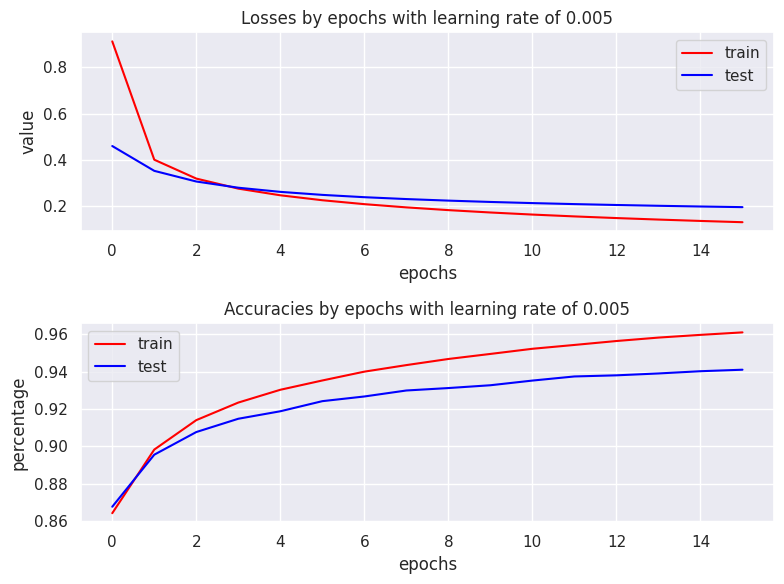

**************************************************
Middle learning rate:
**************************************************
Epoch 1:
Train: average loss: 0.48, accuracy: 0.92798
Test: average loss: 0.27, accuracy: 0.91870
**************************************************
Epoch 2:
Train: average loss: 0.19, accuracy: 0.95190
Test: average loss: 0.21, accuracy: 0.93950
**************************************************
Epoch 3:
Train: average loss: 0.14, accuracy: 0.96240
Test: average loss: 0.18, accuracy: 0.94830
**************************************************
Epoch 4:
Train: average loss: 0.11, accuracy: 0.96347
Test: average loss: 0.19, accuracy: 0.95030
**************************************************
Epoch 5:
Train: average loss: 0.09, accuracy: 0.96815
Test: average loss: 0.18, accuracy: 0.95300
**************************************************
Epoch 6:
Train: average loss: 0.07, accuracy: 0.97453
Test: average loss: 0.18, accuracy: 0.95310
*********************************

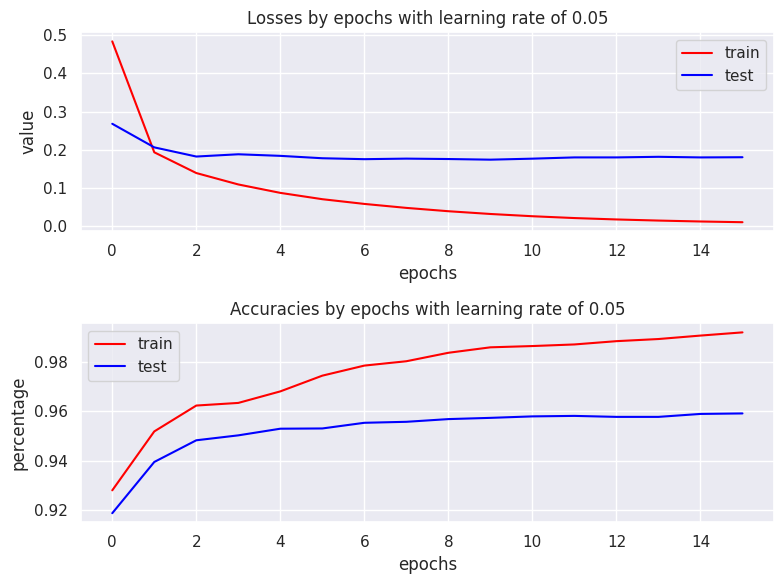

**************************************************
Big learning rate:
**************************************************
Epoch 1:
Train: average loss: nan, accuracy: 0.93012
Test: average loss: 0.24, accuracy: 0.92460
**************************************************
Epoch 2:
Train: average loss: 0.18, accuracy: 0.95093
Test: average loss: 0.19, accuracy: 0.94250
**************************************************
Epoch 3:
Train: average loss: 0.13, accuracy: 0.96205
Test: average loss: 0.17, accuracy: 0.95350
**************************************************
Epoch 4:
Train: average loss: 0.10, accuracy: 0.96908
Test: average loss: 0.16, accuracy: 0.95620
**************************************************
Epoch 5:
Train: average loss: 0.08, accuracy: 0.97578
Test: average loss: 0.15, accuracy: 0.96070
**************************************************
Epoch 6:
Train: average loss: 0.06, accuracy: 0.97445
Test: average loss: 0.16, accuracy: 0.95780
*************************************

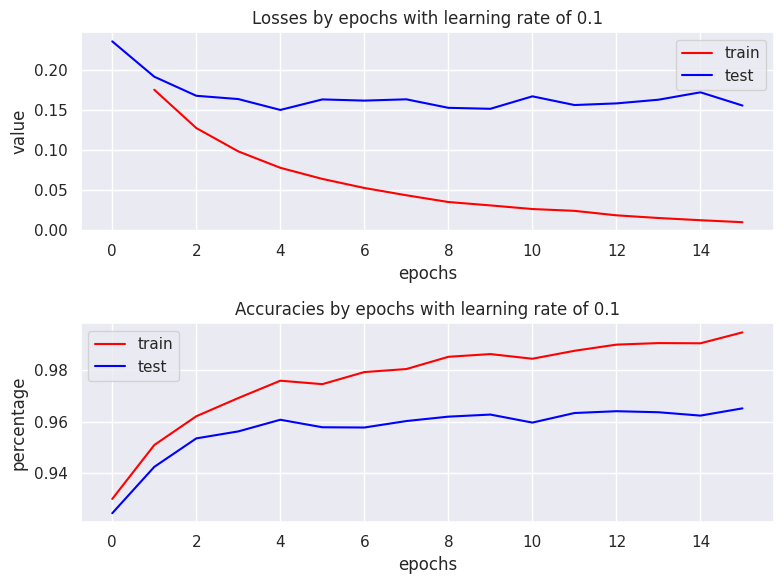

In [19]:
small_lr, middle_lr, big_lr = 0.005, 0.05, 0.1
small_model, middle_model, big_model = FullyConnectedNetwork(784, 10, 128, sigmoid, small_lr), FullyConnectedNetwork(784, 10, 128, sigmoid, middle_lr), \
                                       FullyConnectedNetwork(784, 10, 128, sigmoid, big_lr)

print("Small learning rate:")
small_train_losses, small_train_accuracies, small_test_losses, small_test_accuracies = print_loss_and_accuracy_by_epochs(small_model, train_dataloader, test_dataloader, EPOCHS)
plot_loss_and_accuracy_graphs_by_epochs(small_train_losses, small_train_accuracies, small_test_losses, small_test_accuracies, EPOCHS, small_model.lr)

print('*' * 50)
print("Middle learning rate:")
middle_train_losses, middle_train_accuracies, middle_test_losses, middle_test_accuracies = print_loss_and_accuracy_by_epochs(middle_model, train_dataloader, test_dataloader, EPOCHS)
plot_loss_and_accuracy_graphs_by_epochs(middle_train_losses, middle_train_accuracies, middle_test_losses, middle_test_accuracies, EPOCHS, middle_model.lr)

print('*' * 50)
print("Big learning rate:")
big_train_losses, big_train_accuracies, big_test_losses, big_test_accuracies = print_loss_and_accuracy_by_epochs(big_model, train_dataloader, test_dataloader, EPOCHS)
plot_loss_and_accuracy_graphs_by_epochs(big_train_losses, big_train_accuracies, big_test_losses, big_test_accuracies, EPOCHS, big_model.lr)

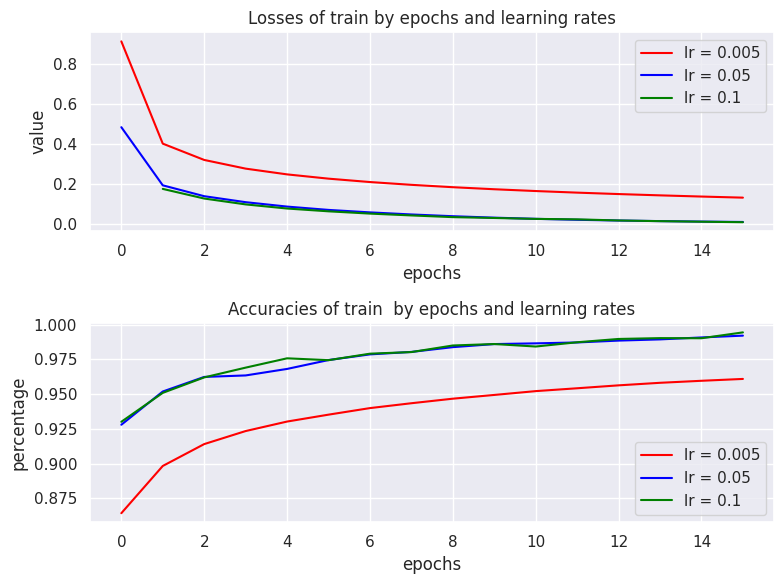

In [20]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))
num_epochs = [i for i in range(EPOCHS)]

axes[0].plot(num_epochs, small_train_losses, label=f'lr = {small_model.lr}', color='red')
axes[0].plot(num_epochs, middle_train_losses, label=f'lr = {middle_model.lr}', color='blue')
axes[0].plot(num_epochs, big_train_losses, label=f'lr = {big_model.lr}', color='green')
axes[0].set_title(f'Losses of train by epochs and learning rates')
axes[0].set_xlabel('epochs')
axes[0].set_ylabel('value')
axes[0].legend()

axes[1].plot(num_epochs, small_train_accuracies, label=f'lr = {small_model.lr}', color='red')
axes[1].plot(num_epochs, middle_train_accuracies, label=f'lr = {middle_model.lr}', color='blue')
axes[1].plot(num_epochs, big_train_accuracies, label=f'lr = {big_model.lr}', color='green')
axes[1].set_title(f'Accuracies of train  by epochs and learning rates')
axes[1].set_xlabel('epochs')
axes[1].set_ylabel('percentage')
axes[1].legend()

plt.tight_layout()

plt.show()

We can see that with a small learning rate: we converge in a slower way to an optimal solution. We can also see that after 16 epochs, we reached a value of loss higher than the values of loss of the other learning rates, and therefore we reached an accuracy on the train set lower than the accuracies of the other learning rates.

We can see that with a big learning rate, we can diverge as we see in the value of the loss in the epoch 1 which is nan. We can also see that the model suffer of oscillations and lack of stability in the training model, as we saw in the graph with train accuracy that oscillates between two epochs.

# Question 3

## I. Implement and Train a CNN (30pt)

<p style="font-size: 17px"> You are a data scientist at a supermarket. Your manager asked you to write a new image classifiaction algorithem for the self checkout cashiers. The images are of products from your grocery store (dataset files are attched in the Moodle).
<br>
Your code and meet the following constraints:
<ul style="font-size: 17px">
<li> Your classifier must be CNN based</li>
<li> You are not allowed to use any pre-trained model</li>
</ul>
<br>
<p style="font-size: 17px">
In order to satisfy your boss you have to reach 65% accuracy on the test set. You will get a bonus for your salary (and 10 points to your grade) if your model's number of paramters is less than 100K. You can reutilize code from the tutorials.

<ul style="font-size: 17px">
<li>Train the model and plot the model's accuracy and loss (both on train and validation sets) as a function of the epochs. </li>
<li>Report the test set accurecy.</li>
<li>Discus the progress you made and describe your final model.</li>

In [1]:
from google.colab import drive

# Mount Google Drive
#All the test/train/val files are dowloaded and accessed via my drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
import matplotlib.pyplot as plt

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [10]:
num_epochs = 20
batch_size = 32
learning_rate = 0.001
l1_lambda = 0.001

transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load Dataset
train_dataset = ImageFolder(root='/content/drive/My Drive/train', transform=transform)
test_dataset = ImageFolder(root='/content/drive/My Drive/test', transform=transform)
val_dataset = ImageFolder(root='/content/drive/My Drive/val', transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)


In [8]:
# Initialize Model
model = CNN()

if torch.cuda.is_available():
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [11]:
# Training the Model
train_losses = []
val_losses = []
train_accuracy = []
val_accuracy = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)

        # L1 regularization
        l1_reg = torch.tensor(0., device=images.device)
        for param in model.parameters():
            l1_reg += torch.norm(param, 1)

        loss += l1_lambda * l1_reg

        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy.append(100 * correct_train / total_train)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    running_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_loss = running_loss / len(val_loader)
    val_accuracy.append(100 * correct_val / total_val)
    val_losses.append(val_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy[-1]:.2f}%, '
          f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy[-1]:.2f}%')


Epoch [1/20], Train Loss: 1.9827, Train Accuracy: 41.81%, Val Loss: 1.0608, Val Accuracy: 49.66%
Epoch [2/20], Train Loss: 1.0424, Train Accuracy: 65.32%, Val Loss: 0.9636, Val Accuracy: 55.41%
Epoch [3/20], Train Loss: 0.9298, Train Accuracy: 67.28%, Val Loss: 1.0279, Val Accuracy: 54.39%
Epoch [4/20], Train Loss: 0.8987, Train Accuracy: 68.34%, Val Loss: 0.9492, Val Accuracy: 56.76%
Epoch [5/20], Train Loss: 0.8752, Train Accuracy: 68.53%, Val Loss: 0.9483, Val Accuracy: 57.09%
Epoch [6/20], Train Loss: 0.8416, Train Accuracy: 70.30%, Val Loss: 0.9822, Val Accuracy: 58.78%
Epoch [7/20], Train Loss: 0.8386, Train Accuracy: 70.15%, Val Loss: 0.9028, Val Accuracy: 64.53%
Epoch [8/20], Train Loss: 0.8228, Train Accuracy: 71.40%, Val Loss: 0.9000, Val Accuracy: 62.50%
Epoch [9/20], Train Loss: 0.7875, Train Accuracy: 72.11%, Val Loss: 0.9378, Val Accuracy: 59.12%
Epoch [10/20], Train Loss: 0.7777, Train Accuracy: 72.11%, Val Loss: 0.8646, Val Accuracy: 64.19%
Epoch [11/20], Train Loss: 0.

In [12]:
# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')


Test Accuracy: 72.64%


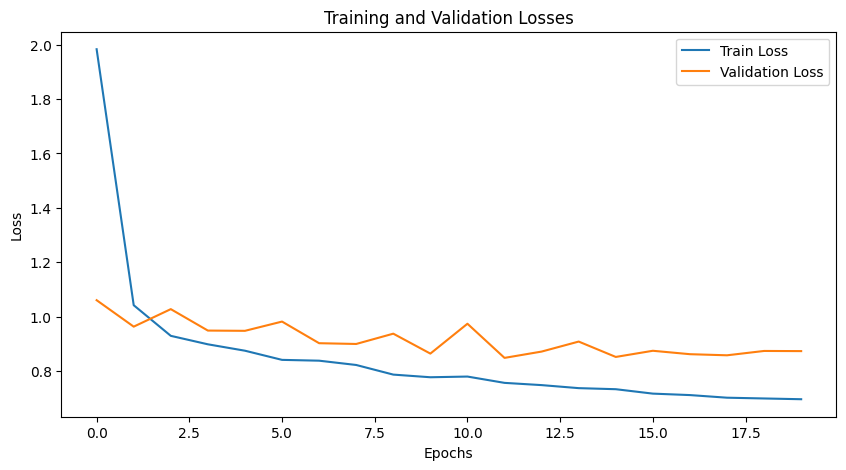

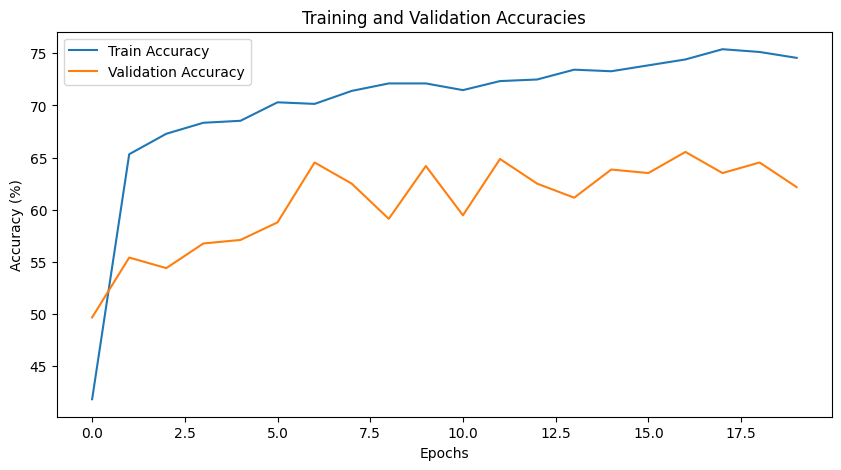

In [13]:

# Plotting training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

# Plotting training and validation accuracies
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracies')
plt.legend()
plt.show()

In [28]:
print('number of parameters: ', sum(param.numel() for param in model.parameters()))

number of parameters:  62006


Throughout the development process, we began by loading and preprocessing images, ensuring their compatibility with our model. We then constructed a convolutional neural network (CNN) architecture with two convolutional layers followed by max-pooling, and three fully connected layers. ReLU activation functions were utilized for non-linearity, while softmax activation was employed for multi-class classification. To evitate overfitting, L1 regularization was applied to penalize large weights. Training was conducted using the Adam optimizer with a learning rate of 0.001. The model's input images underwent standard preprocessing steps including resizing, center cropping, converting to tensors, and normalization. This culminated in a robust CNN capable of effectively classifying images while mitigating overfitting.
Moreover, we note that our final number of parameters is 62006, less than 100K and that the test accuracy obtained is more or less 75%.

## II. Analyzing a Pre-trained CNN (Filters) (10pt)

In this part, you are going to analyze a (large) pre-trained model. Pre-trained models are quite popular these days, as big companies can train really large models on large datasets (something that personal users can't do as they lack the sufficient hardware). These pre-trained models can be used to fine-tune on other/small datasets or used as components in other tasks (like using a pre-trained classifier for object detection).

All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225].

You can use the following transform to normalize:

<code>normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])</code>
<a href="https://pytorch.org/vision/stable/models.html">Read more here</a>


1. Load a pre-trained VGG16 with PyTorch using torchvision.models.vgg16(pretrained=True, progress=True, **kwargs) (<a href="https://pytorch.org/vision/stable/models.html#classification">read more here</a>). Don't forget to use the model in evaluation mode (<code>model.eval()</code>).

2. Load the images in the 'birds' folder and display them.

3. Pre-process the images to fit VGG16's architecture. What steps did you take?

4. Feed the images (forward pass) to the model. What are the outputs?

5. Choose an image of a dog in the 'dogs' folder, display it and feed it to network. What are the outputs?

6. For the first 3 filters in the first layer of VGG16, plot the filters, and then plot their response (their output) for the image from question 5. Explain your observations.

In [29]:
from google.colab import drive

# Mount Google Drive
#All the birds/dogs files are dowloaded and accessed via my drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import os

vgg16 = models.vgg16(pretrained=True)
vgg16.eval()

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 89.6MB/s]


Overall, the preprocess transformation prepares the input image for consumption by a neural network by resizing (this step ensures that the image is a consistent size before further processing), cropping (helps focus on the most relevant part of the image), converting to a tensor (allowing it to be processed by neural networks), and normalizing its pixel values (helps to stabilize and standardize the input data).

In [31]:
# Function to load and preprocess images
def load_and_preprocess_images(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = Image.open(img_path)
        img_tensor = preprocess(img).unsqueeze(0)
        images.append((img, img_tensor))
    return images

Bird 1 Output:
tensor([[ 2.7060e+00,  5.0277e+00,  2.9450e+00, -2.4858e-02,  2.4988e+00,
          5.6518e+00, -3.4072e-01,  3.1121e+00,  1.6135e+00,  2.4929e+00,
          9.1234e+00,  6.1760e+00,  7.7521e+00,  6.6037e+00,  1.1655e+01,
          7.8751e+00,  1.3027e+01,  1.2279e+01,  1.1689e+01,  1.0140e+01,
          1.5392e+01,  1.3191e+01,  1.8790e+00,  5.6937e+00,  4.0444e+00,
          6.2261e-01,  4.5118e+00, -2.2119e-01, -1.2594e+00,  3.5354e+00,
          3.3018e+00,  2.1493e+00,  3.5794e+00,  2.7929e+00,  4.5813e+00,
          1.6225e+00,  5.0983e+00, -2.6581e+00,  5.2292e+00,  1.2032e+00,
          1.0537e+01,  6.8741e+00,  1.1330e+01,  8.1567e+00,  6.2877e+00,
         -1.1993e+00,  9.1111e+00,  1.1892e+01, -2.2449e-01, -8.4637e-01,
         -6.9902e-01,  4.0637e+00,  3.5153e+00,  5.4052e+00,  7.5434e-01,
          4.2801e+00, -5.1978e-01, -1.6011e+00,  3.9177e+00,  1.2785e+01,
          3.0190e+00, -1.9027e+00,  8.6624e-01,  6.0651e+00,  8.1334e+00,
          5.0426e+00,  

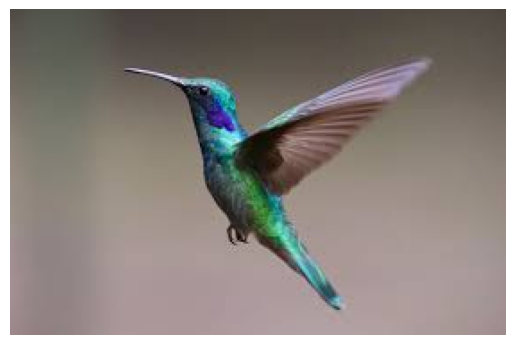

Bird 2 Output:
tensor([[ 1.4935e+00,  8.1809e+00, -1.5602e+00, -3.8882e+00, -4.1595e+00,
         -1.2790e+00, -2.9763e+00,  7.4214e+00,  6.3584e+00, -4.3470e-02,
          9.5735e+00,  1.3498e+01,  9.7240e+00,  5.7353e+00,  1.0312e+01,
          8.6859e+00,  1.2129e+01,  7.4136e+00,  7.8780e+00,  5.0433e+00,
          6.7286e+00,  8.6189e+00,  5.1014e+00,  6.9557e+00,  2.1671e+00,
          3.2122e+00,  2.7483e+00,  4.0267e+00, -1.8364e-01,  2.1162e+00,
         -4.7759e-01,  6.0199e+00,  3.4347e+00, -2.1924e+00, -2.1848e+00,
          9.3482e-01,  2.7815e+00,  2.2177e+00,  2.5251e+00,  3.2634e+00,
          7.4696e+00,  2.9861e+00,  8.1169e+00,  3.6356e+00,  1.7902e+00,
          3.2610e-01,  7.4471e+00,  5.6811e+00,  3.9690e-01, -7.6875e-01,
         -1.3764e+00, -3.8673e-01,  4.2682e-01,  2.2279e+00, -2.1433e+00,
          3.0128e+00, -1.5366e-01, -1.0404e+00, -3.3834e-01,  5.4065e+00,
          6.6944e-01, -2.3057e+00, -7.1167e-01,  7.8787e-01,  4.7581e+00,
         -8.2578e-01, -

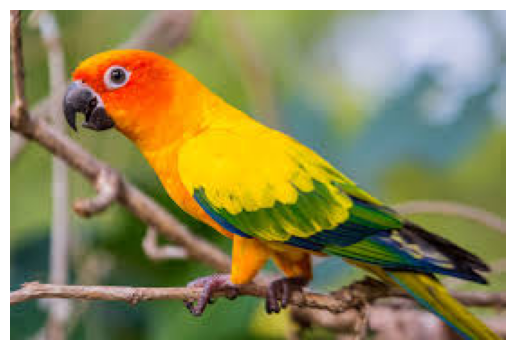

In [32]:
birds_folder = '/content/drive/My Drive/birds'
bird_images = load_and_preprocess_images(birds_folder)

# Feed bird images to the model and print the outputs
for i, (img, img_tensor) in enumerate(bird_images):
    with torch.no_grad():
        output = vgg16(img_tensor)
    print(f'Bird {i+1} Output:')
    print(output)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


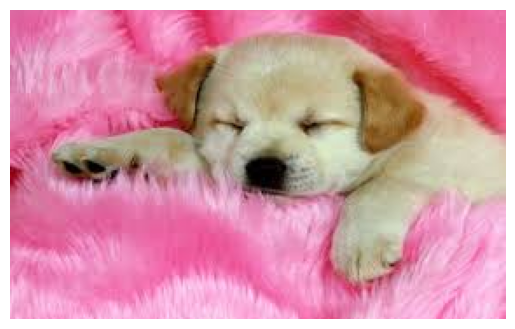

Dog Output:
tensor([[-1.0665e+00, -3.4737e-01, -1.1635e+00, -4.0354e+00, -4.3733e+00,
          4.0821e-02, -3.4692e+00, -2.2647e+00, -5.4602e-01, -6.6507e+00,
         -5.5257e+00, -3.7469e+00, -7.5062e+00, -6.5018e+00, -5.0962e+00,
         -4.6016e+00, -6.3976e+00, -3.4901e+00, -5.0018e+00, -4.2078e+00,
         -5.8943e+00, -4.7018e+00, -4.5749e+00, -2.4210e+00, -5.5900e+00,
         -1.8038e+00, -2.1476e+00, -2.3843e+00, -5.1457e-02,  1.3086e+00,
         -2.4418e+00, -3.3346e-01, -5.9248e-01, -5.7256e-01, -1.4466e+00,
         -3.5574e+00, -1.0416e+00, -3.0194e+00, -1.8888e+00, -5.5253e+00,
         -4.0976e+00, -5.1803e+00, -5.9235e+00, -5.7396e+00, -6.6071e+00,
         -1.1478e+00, -3.8129e+00, -2.9223e+00, -3.6765e+00, -6.2376e+00,
         -4.4226e+00, -1.3430e+00, -2.7407e+00, -2.8506e+00, -4.2613e+00,
         -3.0454e+00, -2.7749e+00, -4.7005e+00, -4.6981e+00, -3.8195e+00,
         -2.7364e+00, -2.0315e+00, -1.5855e+00, -7.5287e-01, -2.0412e+00,
         -2.9981e+00, -2.4

In [33]:
# Load and display an image of a dog from the 'dogs' folder
dogs_folder = '/content/drive/My Drive/dogs'
dog_files = os.listdir(dogs_folder)
dog_img_path = os.path.join(dogs_folder, dog_files[0])
dog_img = Image.open(dog_img_path)

plt.imshow(dog_img)
plt.axis('off')
plt.show()

dog_tensor = preprocess(dog_img).unsqueeze(0)

# Feed the dog image to the model
with torch.no_grad():
    dog_output = vgg16(dog_tensor)

print("Dog Output:")
print(dog_output)

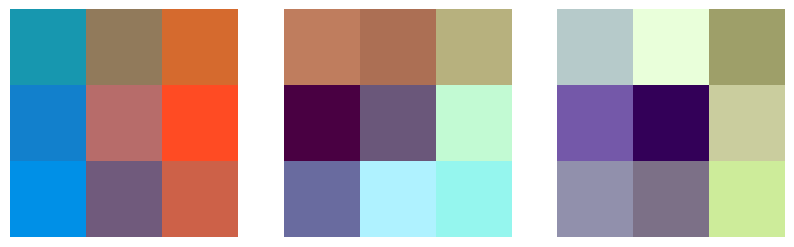

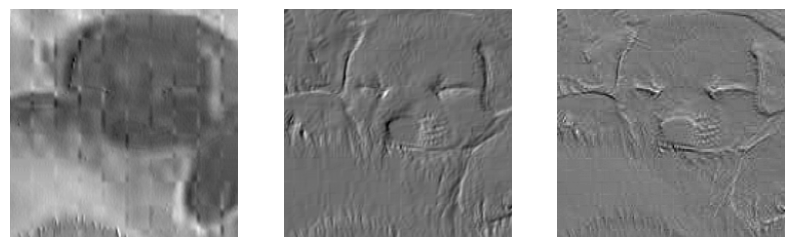

In [34]:
# Plot the first 3 filters in the first layer of VGG16
filters = vgg16.features[0].weight.data.clone()
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i in range(3):
    filter_img = filters[i].clone().detach().cpu()
    filter_img = filter_img - filter_img.min()
    filter_img /= filter_img.max()
    axes[i].imshow(filter_img.permute(1, 2, 0))
    axes[i].axis('off')
plt.show()

# Plot the response of the first 3 filters for the choosen dog image
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i in range(3):
    response = torch.nn.functional.conv2d(dog_tensor, filters[i].unsqueeze(0))
    axes[i].imshow(response.squeeze().numpy(), cmap='gray')
    axes[i].axis('off')
plt.show()

Responses show which areas of the image activate each filter the most. Brighter regions indicate higher activation.
Observing the filters and their responses give insight into what kind of patterns the network is learning at the first layer.